In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train_A.csv')

df = df.fillna(df.median(numeric_only=True))  #For numeric columns
#Encode categorical variables
categorical_cols = ['day_of_week', 'restaurant_type', 'cuisine_type', 
                    'weather_condition', 'traffic_density', 'area_type']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [ ]:
#Encode target variable
df['is_late_binary'] = (df['is_late'] == 'late').astype(int)

feature_cols = [col for col in df.columns if col not in ['id', 'is_late', 'is_late_binary']]
X = df[feature_cols]
y = df['is_late_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

#Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['on_time', 'late']))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Classification Report:
              precision    recall  f1-score   support

     on_time       0.65      0.79      0.71       363
        late       0.51      0.35      0.41       237

    accuracy                           0.61       600
   macro avg       0.58      0.57      0.56       600
weighted avg       0.59      0.61      0.59       600

ROC-AUC Score: 0.5953


In [ ]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Important Features:")
print(feature_importance.head(10))


Top 10 Important Features:
                    feature  importance
12  delivery_partner_orders    0.105951
6           order_value_inr    0.099399
14  restaurant_avg_prep_min    0.099237
4               distance_km    0.098460
5    estimated_delivery_min    0.080501
13        restaurant_rating    0.073653
11  delivery_partner_rating    0.069591
0                order_hour    0.059615
7                 num_items    0.057873
10          traffic_density    0.055449


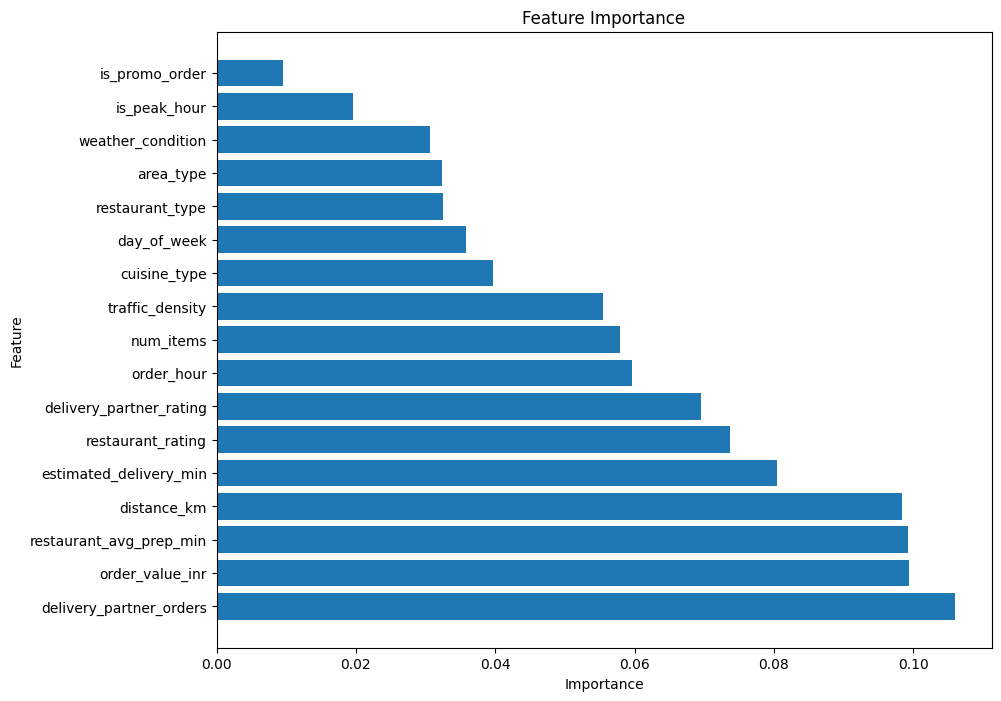

In [9]:
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()